# **Fraud Detection in Financial Transactions Using Machine Learning**

## **Introduction**
In today's digital economy, transactions are increasing at an exponential rate. However, with this growth comes a significant rise in fraudulent activities, leading to financial losses and security threats. Fraud detection systems aim to identify suspicious transactions in real-time to minimize risks. This project focuses on detecting fraudulent transactions using machine learning techniques by analyzing patterns and anomalies in financial transaction data.

## **Problem Statement**
Online fraud is a serious challenge faced by financial institutions, e-commerce platforms, and digital payment systems. Traditional rule-based fraud detection methods struggle to keep up with evolving fraud techniques. The goal of this project is to develop a machine learning model that can effectively identify fraudulent transactions with high accuracy while minimizing false positives.

## **Project Goals and Objectives**
The primary objectives of this project are:
- To analyze transaction data and identify key features contributing to fraud detection.
- To apply machine learning algorithms for classifying fraudulent and legitimate transactions.
- To optimize model performance using hyperparameter tuning and feature engineering.
- To evaluate the model's effectiveness based on accuracy, precision, recall, and F1-score.
- To deploy a predictive system that can help detect fraudulent activities in real-time.

## **Dataset Description**
The dataset consists of 11 variables:
- **step**: Represents a unit of time where 1 step equals 1 hour.
- **type**: Type of online transaction.
- **amount**: The amount of the transaction.
- **nameOrig**: Customer starting the transaction.
- **oldbalanceOrg**: Balance before the transaction.
- **newbalanceOrig**: Balance after the transaction.
- **nameDest**: Recipient of the transaction.
- **oldbalanceDest**: Initial balance of recipient before the transaction.
- **newbalanceDest**: The new balance of recipient after the transaction.
- **isFraud**: A binary label indicating whether the transaction is fraudulent (1) or not (0).
- **isFlaggedFraud**: Indicates if the transaction was flagged as suspicious.

## **Methodology**
The project follows a structured approach:

1. **Data Preprocessing**
   - Handling missing values
   - Encoding categorical variables
   - standardization

2. **Exploratory Data Analysis (EDA)**
   - Visualizing transaction patterns
   - Analyzing correlations between features
   - Identifying trends in fraudulent activities

3. **Feature Engineering**
   - Selecting important features
   - Creating new informative variables

4. **Model Training & Evaluation**
   - Splitting data into training and testing sets
   - Training various machine learning models
   - Handling Imbalance - Over Sampling
   - Hyperparameter tuning and cross-validation
   - Evaluating model performance using accuracy, precision, recall, and F1-score

5. **Deployment**
   - Implementing the model in a real-time fraud detection system
   - Monitoring performance on live transaction data

## **Algorithms Used**
Multiple machine learning models will be tested and compared, including:
- **Random Forest Classifier**
- **Logistic Regression**
- **Support Vector Machine (SVM)**
- **K-Nearest Neighbors (KNN)**
- **Naive Bayes**
- **Decision Tree**
- **AdaBoost**
- **Gradient Boosting**
- **XGBoost**

## **Expected Outcomes**
- A well-trained machine learning model that can effectively classify fraudulent transactions.
- Insights into the patterns and characteristics of fraud.
- Improved fraud detection with high precision and recall.
- A deployed system that can flag suspicious transactions for further investigation.

## **Conclusion**
This project aims to enhance fraud detection efficiency using machine learning techniques. By leveraging data-driven insights and predictive models, financial institutions can proactively prevent fraudulent transactions, ensuring safer online transactions for users.

Developed By,
Nimisha
https://linktr.ee/drnimishadavis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder

In [3]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [4]:
from sklearn.metrics import (
    accuracy_score,              
    confusion_matrix,           
    roc_auc_score,                
    roc_curve,                   
    precision_score,             
    recall_score,                
    f1_score,           
    auc,
classification_report,

)

### Load Dataset

In [5]:
# Download Dataset from here : https://www.kaggle.com/datasets/drnimishadavis/onlinefraud
data=pd.read_csv('dataset/onlinefraud.csv',nrows=50000)
data.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

### Preprocessing

In [27]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [7]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    2
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
data['newbalanceOrig'].fillna(data['newbalanceOrig'].mean(), inplace=True)

In [9]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [32]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [33]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [7]:
type_mapping = {
    'PAYMENT': 0,
    'TRANSFER': 1,
    'CASH_OUT': 2,
    'DEBIT': 3,
    'CASH_IN': 4
}
data['type'] = data['type'].map(type_mapping)

In [12]:
data.head()

step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     0   9839.64  C1231006815       170136.0       160296.36   
1     1     0   1864.28  C1666544295        21249.0        19384.72   
2     1     1    181.00  C1305486145          181.0            0.00   
3     1     2    181.00   C840083671          181.0            0.00   
4     1     0  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [8]:
label_encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])

In [38]:
data.dtypes

step                int64
type                int64
amount            float64
nameOrig            int32
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest            int32
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [39]:
data.head()

step  type    amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
0     1     0   9839.64      5827       170136.0       160296.36     17577   
1     1     0   1864.28     17147        21249.0        19384.72     18288   
2     1     1    181.00      7732          181.0            0.00      5084   
3     1     2    181.00     45845          181.0            0.00      4508   
4     1     0  11668.14     27000        41554.0        29885.86      9098   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0             0.0             0.0        0               0  
1             0.0             0.0        0               0  
2             0.0             0.0        1               0  
3         21182.0             0.0        1               0  
4             0.0             0.0        0               0

In [40]:
data['step'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

### Outlier detection and handling

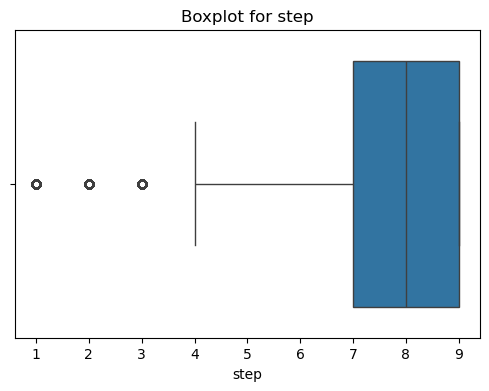

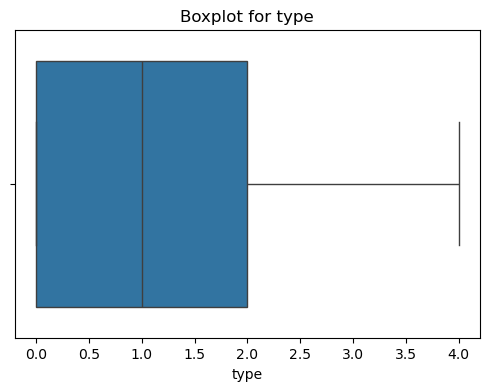

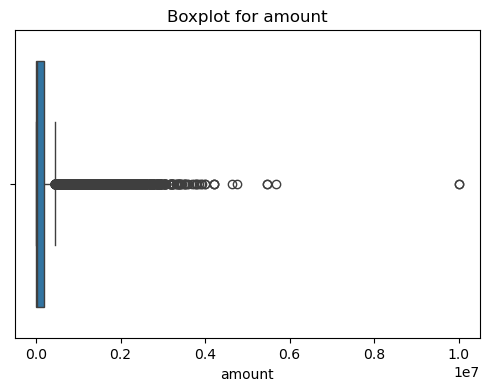

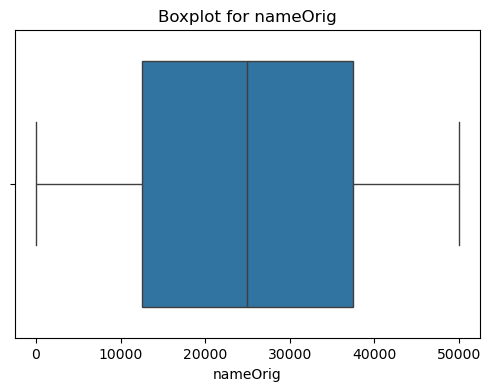

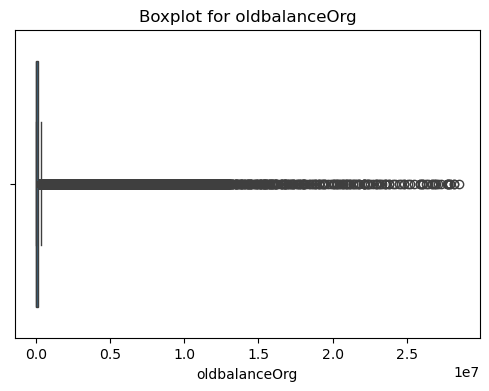

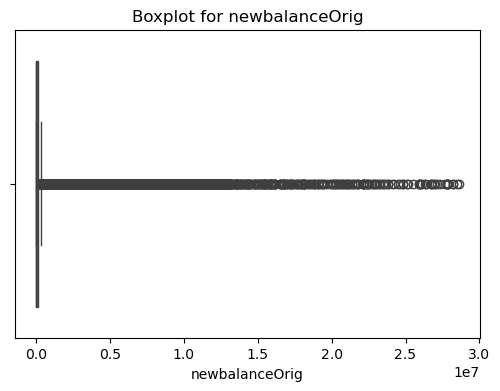

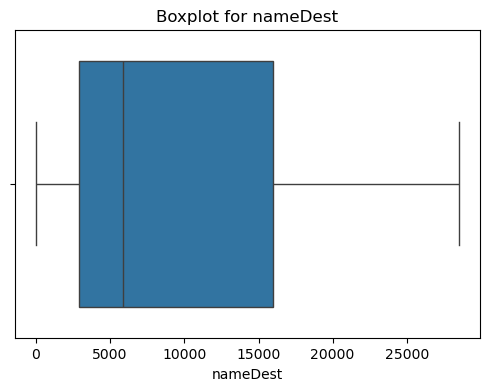

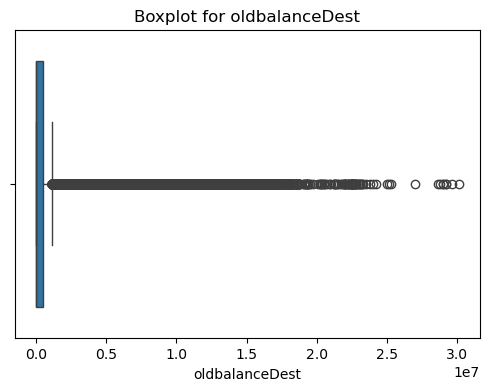

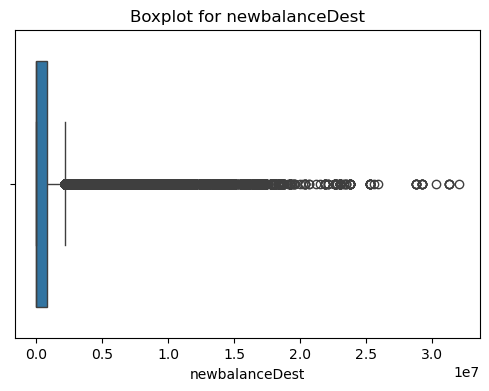

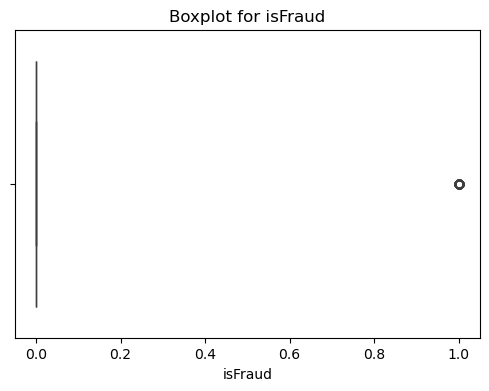

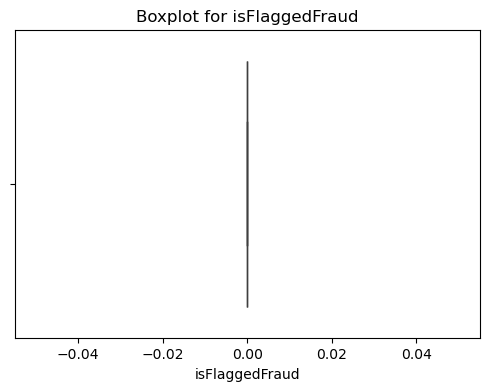

In [41]:
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

In [9]:
def handle_outliers_clip(data):
    data = data.copy()
    num_cols = [col for col in data.select_dtypes(include=[np.number]).columns if col not in ['isFraud']]
    
    for col in num_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    
    return data

data_no_outliers_clip = handle_outliers_clip(data)
print(data_no_outliers_clip['isFraud'].value_counts())  

isFraud
0    49900
1      100
Name: count, dtype: int64


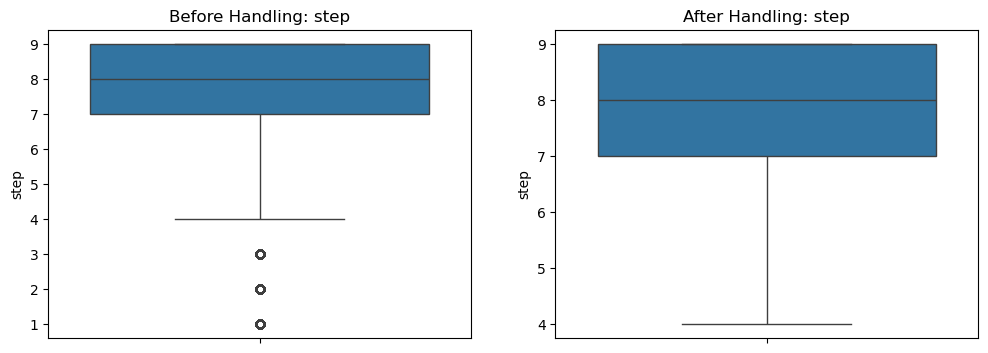

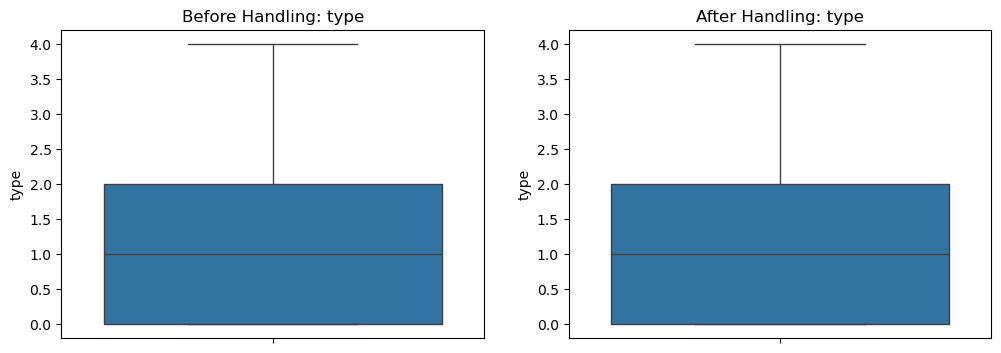

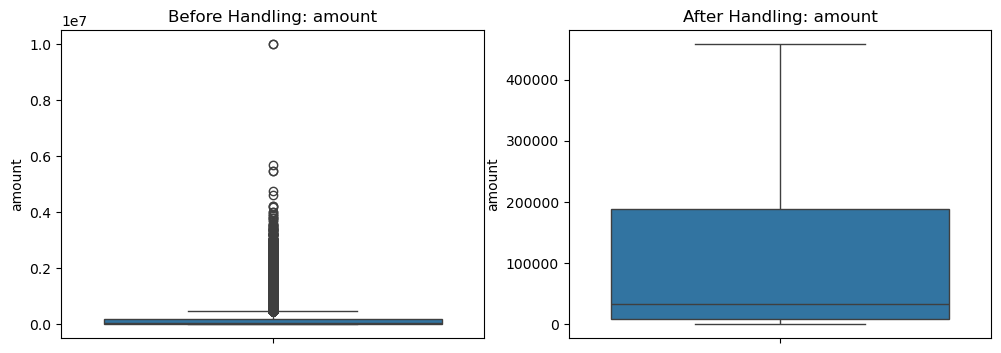

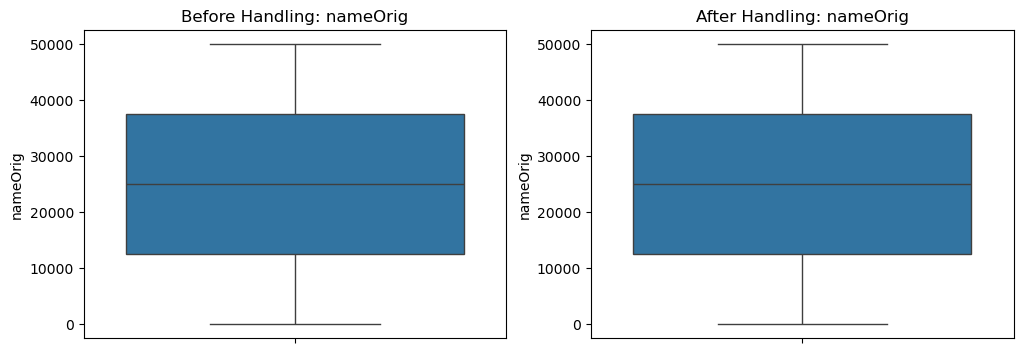

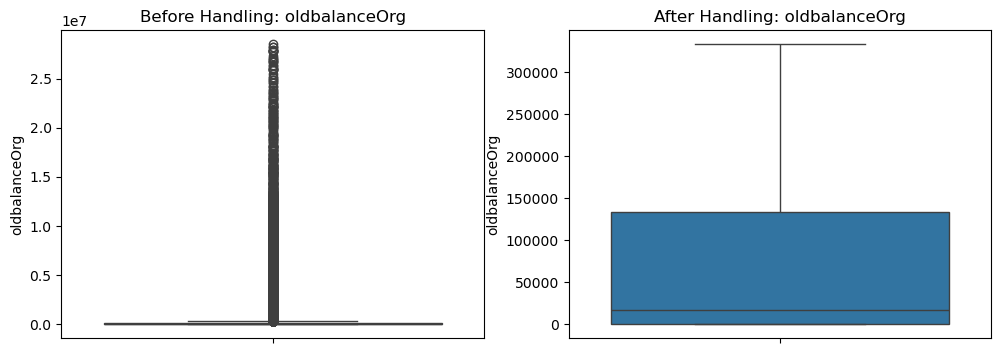

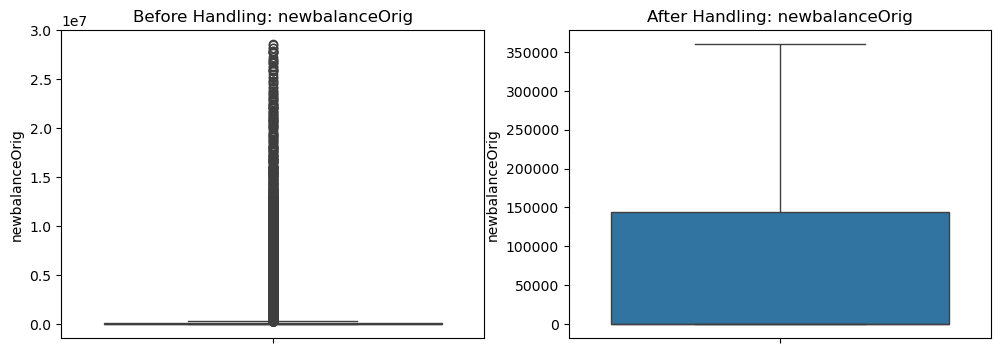

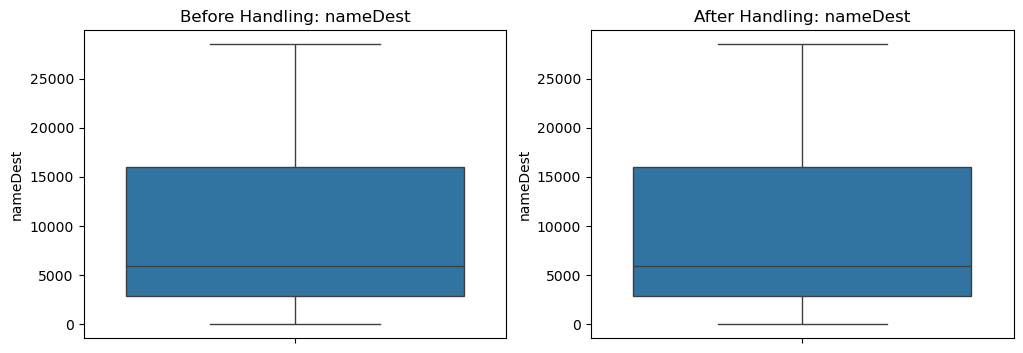

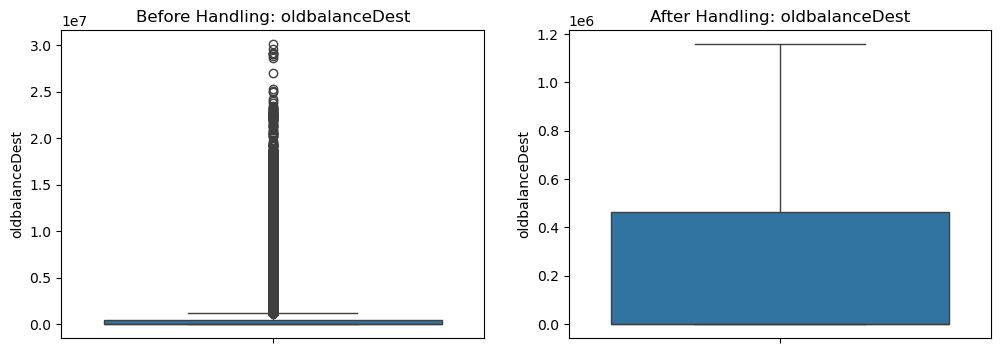

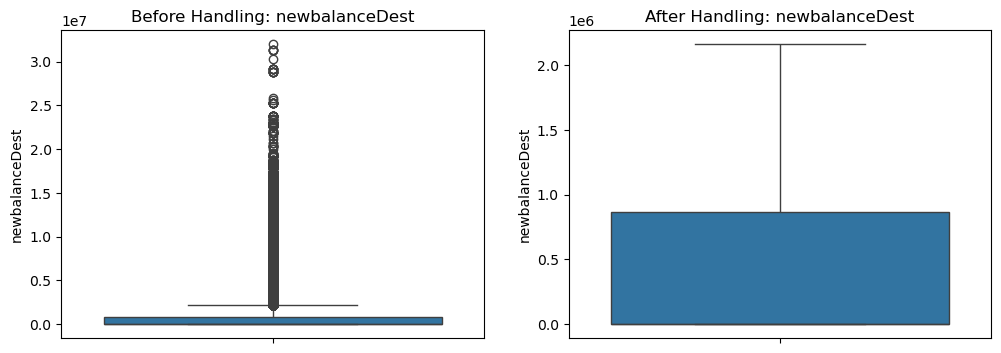

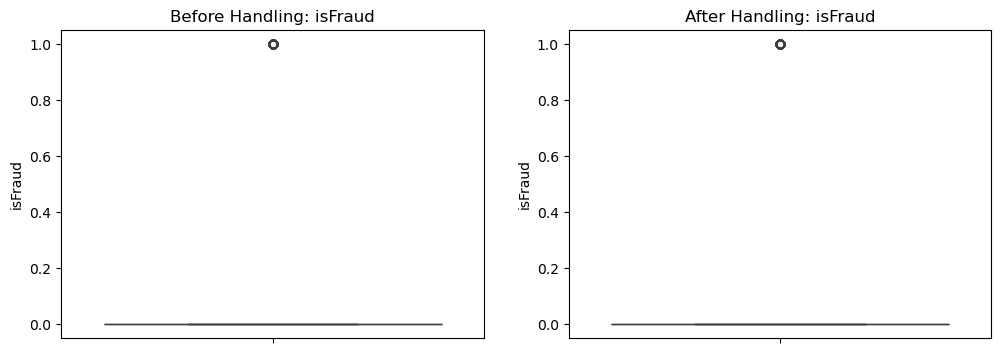

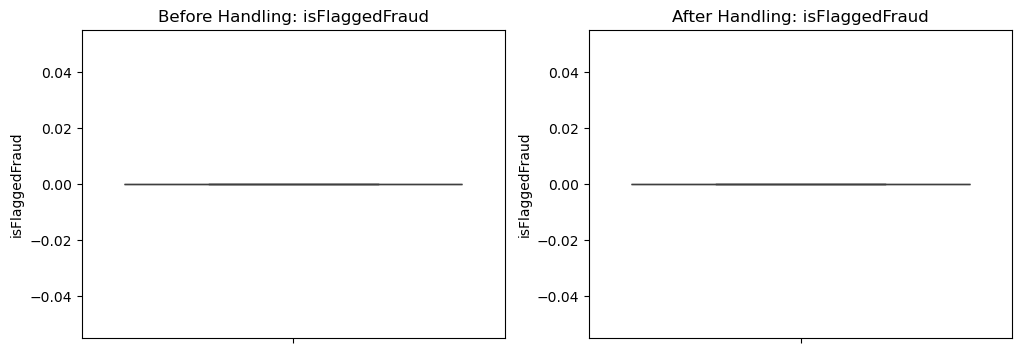

In [43]:
num_cols = data_no_outliers_clip.columns
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.boxplot(y=data[col], ax=axes[0])
    axes[0].set_title(f"Before Handling: {col}")

    sns.boxplot(y=data_no_outliers_clip[col], ax=axes[1])
    axes[1].set_title(f"After Handling: {col}")

    plt.show()


### Exploratory Data Analysis (EDA)

In [44]:
data.shape

(50000, 11)

In [45]:
data.size

550000

In [46]:
data.describe()

step         type        amount      nameOrig  oldbalanceOrg  \
count  50000.000000  50000.00000  5.000000e+04  50000.000000   5.000000e+04   
mean       7.453800      1.40200  1.562645e+05  24999.500000   7.333085e+05   
std        2.056636      1.49049  3.243949e+05  14433.901067   2.202383e+06   
min        1.000000      0.00000  6.300000e-01      0.000000   0.000000e+00   
25%        7.000000      0.00000  7.734573e+03  12499.750000   0.000000e+00   
50%        8.000000      1.00000  3.341482e+04  24999.500000   1.703072e+04   
75%        9.000000      2.00000  1.878390e+05  37499.250000   1.331716e+05   
max        9.000000      4.00000  1.000000e+07  49999.000000   2.850000e+07   

       newbalanceOrig      nameDest  oldbalanceDest  newbalanceDest  \
count    5.000000e+04  50000.000000    5.000000e+04    5.000000e+04   
mean     7.473080e+05   9525.570860    8.444788e+05    1.164464e+06   
std      2.239965e+06   8351.299295    2.433474e+06    2.915438e+06   
min      0.000000e+00      0.000000    0.000000e+00    0.000000e+00   
25%      0.000000e+00   2870.750000    0.000000e+00    0.000000e+00   
50%      0.000000e+00   5873.500000    2.126000e+03    0.000000e+00   
75%      1.440106e+05  15998.250000    4.632050e+05    8.649264e+05   
max      2.860000e+07  28498.000000    3.010000e+07    3.200000e+07   

            isFraud  isFlaggedFraud  
count  50000.000000         50000.0  
mean       0.002000             0.0  
std        0.044677             0.0  
min        0.000000             0.0  
25%        0.000000             0.0  
50%        0.000000             0.0  
75%        0.000000             0.0  
max        1.000000             0.0

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            50000 non-null  int64  
 1   type            50000 non-null  int64  
 2   amount          50000 non-null  float64
 3   nameOrig        50000 non-null  int32  
 4   oldbalanceOrg   50000 non-null  float64
 5   newbalanceOrig  50000 non-null  float64
 6   nameDest        50000 non-null  int32  
 7   oldbalanceDest  50000 non-null  float64
 8   newbalanceDest  50000 non-null  float64
 9   isFraud         50000 non-null  int64  
 10  isFlaggedFraud  50000 non-null  int64  
dtypes: float64(5), int32(2), int64(4)
memory usage: 3.8 MB


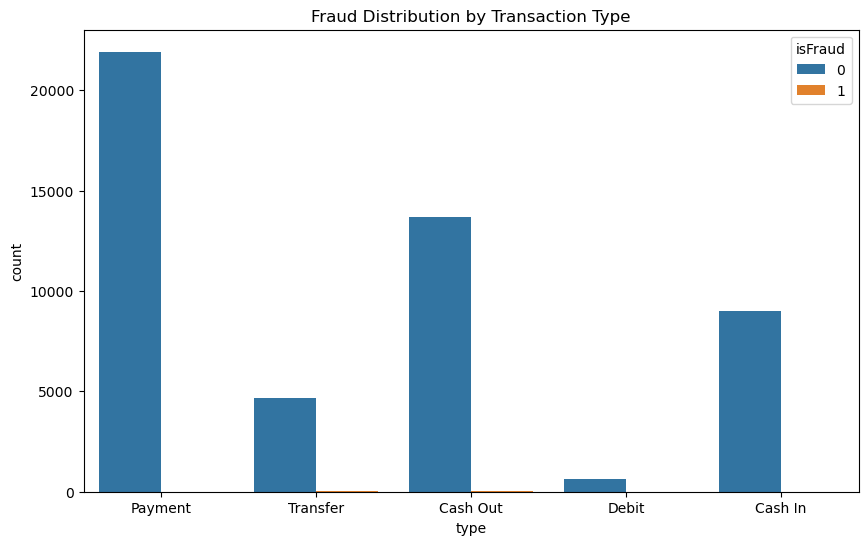

In [48]:
# Fraud Transactions Analysis
# Visualize how fraud transactions are distributed across different transaction types.
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='type', hue='isFraud', data=data_no_outliers_clip)
ax.set_xticklabels(['Payment', 'Transfer', 'Cash Out', 'Debit', 'Cash In'])
plt.title("Fraud Distribution by Transaction Type")
plt.show()

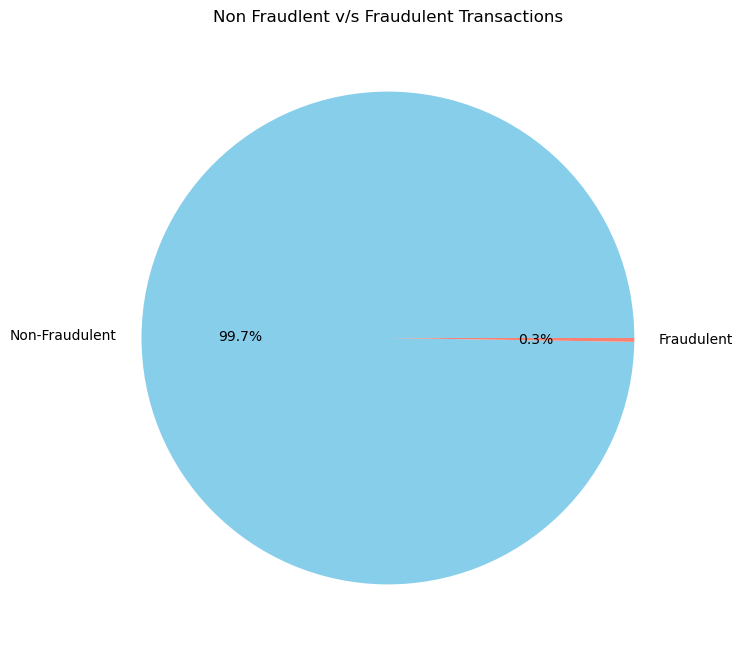

In [49]:
# Pie Chart for Distribution of Transaction Amounts by Fraudulent/Non-Fraudulent Transactions
fraud_amounts = data_no_outliers_clip.groupby('isFraud')['amount'].sum()  
plt.figure(figsize=(8, 8))
plt.pie(fraud_amounts, labels=['Non-Fraudulent', 'Fraudulent'], autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Non Fraudlent v/s Fraudulent Transactions')
plt.show()


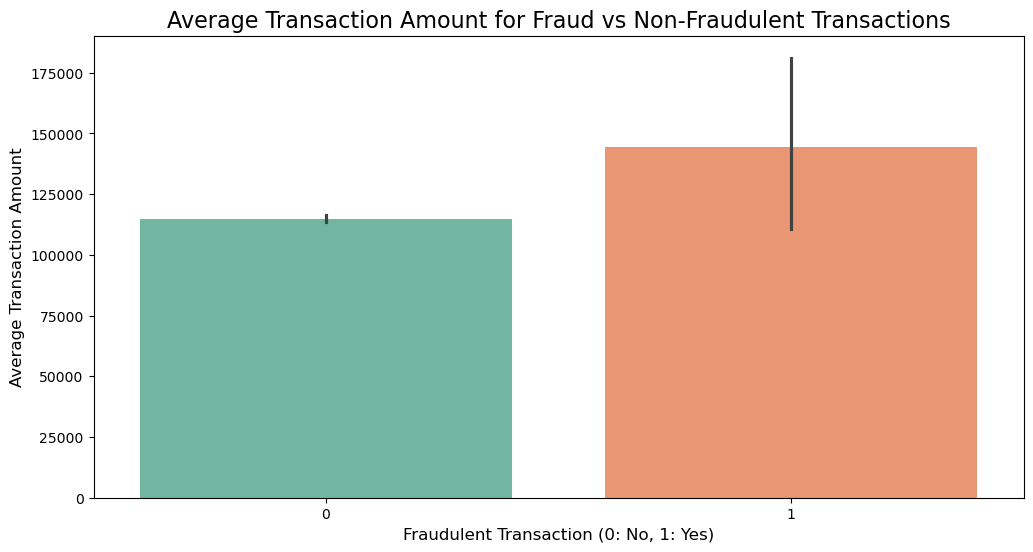

In [50]:
# Barplot of Average Transaction Amount for Fraud vs Non-Fraud
plt.figure(figsize=(12, 6))
sns.barplot(x='isFraud', y='amount', data=data_no_outliers_clip, palette='Set2')
plt.title('Average Transaction Amount for Fraud vs Non-Fraudulent Transactions', fontsize=16)
plt.xlabel('Fraudulent Transaction (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Average Transaction Amount', fontsize=12)
plt.show()

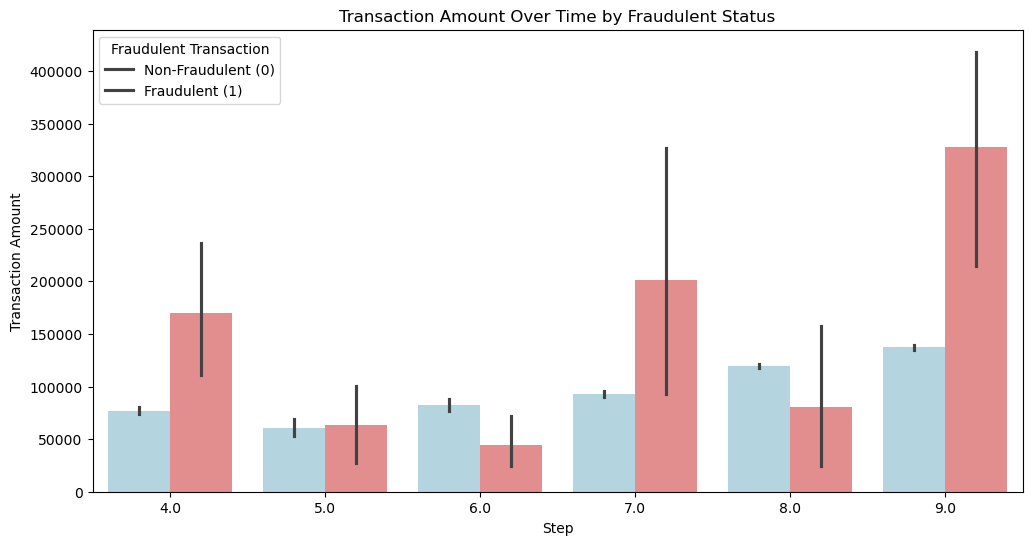

In [51]:
# Fraudulent Transactions vs Non-Fraudulent Transactions amount Over Time
plt.figure(figsize=(12, 6))
sns.barplot(x='step', y='amount', data=data_no_outliers_clip, hue='isFraud', palette={0: 'lightblue', 1: 'lightcoral'})
plt.title('Transaction Amount Over Time by Fraudulent Status')
plt.xlabel('Step')
plt.ylabel('Transaction Amount')
plt.legend(title='Fraudulent Transaction', labels=['Non-Fraudulent (0)', 'Fraudulent (1)'])
plt.show()

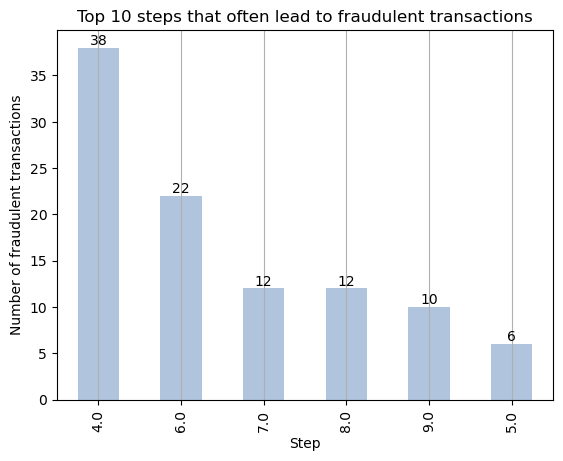

In [52]:
# displays the top 10 steps where fraudulent transactions are most likely to occur
data1 = data_no_outliers_clip[data_no_outliers_clip['isFraud']==1]
data2 = data1['step'].value_counts().head(10)
ax = data2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 steps that often lead to fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Step')
plt.grid(axis='x')

del ax, data2

* **Step 4** has the highest number of fraudulent transactions. 
* This indicates that Step 4 is the step that will most likely lead to fraudulent transactions.

<Axes: >

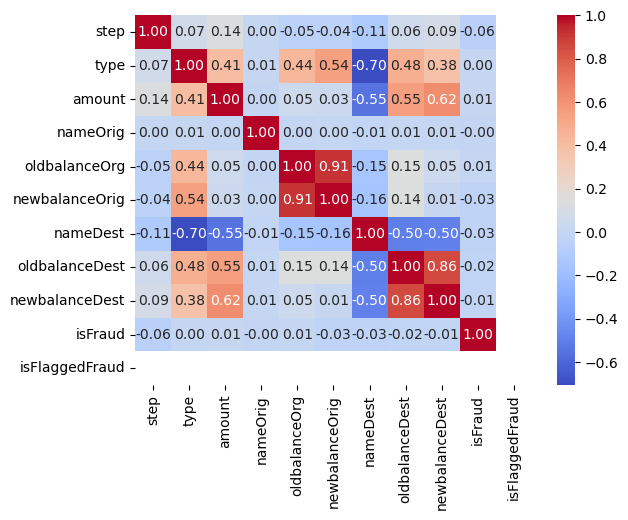

In [53]:
# Correlation heatmap
sns.heatmap(data_no_outliers_clip.corr(), annot=True, cmap="coolwarm", fmt=".2f")

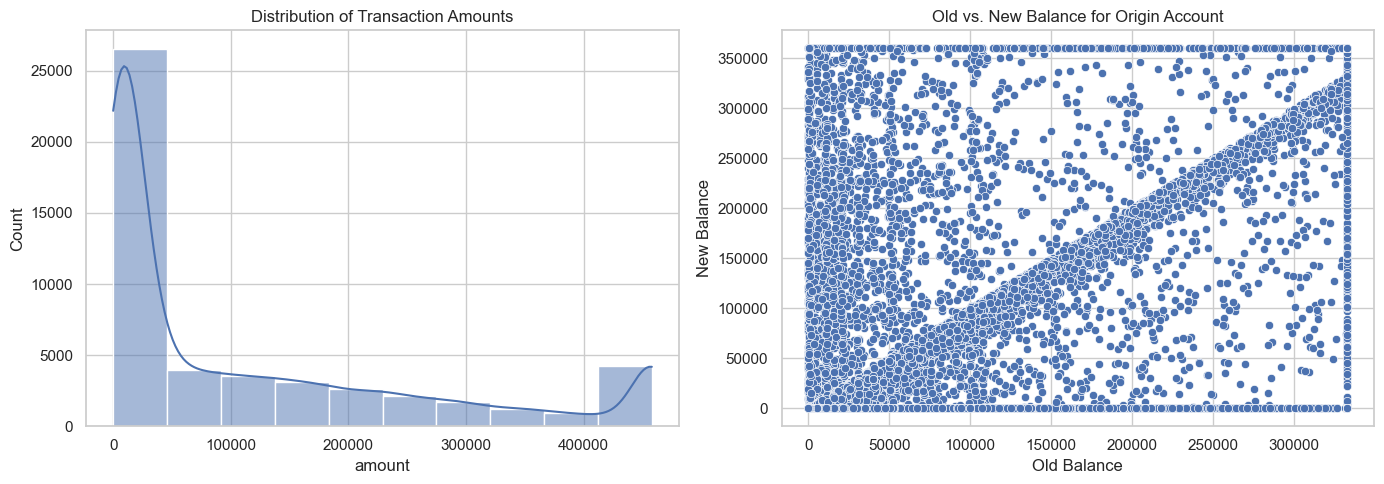

In [54]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of transaction amounts
sns.histplot(data_no_outliers_clip["amount"], bins=10, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Transaction Amounts")

# Balance before vs. after transactions for origin accounts
sns.scatterplot(x=data_no_outliers_clip["oldbalanceOrg"], y=data_no_outliers_clip["newbalanceOrig"], ax=axes[1])
axes[1].set_title("Old vs. New Balance for Origin Account")
axes[1].set_xlabel("Old Balance")
axes[1].set_ylabel("New Balance")

plt.tight_layout()
plt.show()


1️⃣ Histogram of Transaction Amounts (Left Plot)

Observation:

The distribution is highly right-skewed (most transactions involve small amounts).
A sharp peak at lower values (~0–50,000) suggests that most transactions are of low value.
There is a long tail, indicating a few very large transactions (above 400,000).

Possible Insights:

Fraudulent transactions often involve high-value anomalies—you might want to check transactions at the far right of the histogram.
If working with financial fraud detection, you should investigate the highest transaction amounts for unusual patterns.

2️⃣ Scatter Plot: Old vs. New Balance for Origin Account (Right Plot)

Observation:

A strong diagonal pattern (points along a 45° line) indicates that for many accounts, the new balance is almost equal to the old balance, meaning transactions were minimal.
Many data points cluster around the bottom (new balance = 0), meaning many accounts were emptied after a transaction.
There is a dense region at the top, suggesting some accounts maintain high balances even after transactions.

Possible Insights:

Accounts that go from high balance → zero balance could indicate suspicious transactions (cash-outs, fraud).
A wide spread of data means that not all transactions are simple balance deductions—some could involve partial withdrawals or fund transfers.
If fraud is suspected, transactions where new balance remains high despite large outgoing transactions should be investigated.

In [55]:
# Investigate suspicious transactions
suspicious_transactions = data_no_outliers_clip[(data_no_outliers_clip['newbalanceOrig'] == 0) & (data_no_outliers_clip['amount'] > data_no_outliers_clip['oldbalanceOrg'] * 0.9)]
print("Suspicious Transactions: \n", suspicious_transactions)

# Transactions where high withdrawals still leave high balances
unusual_transactions = data_no_outliers_clip[(data_no_outliers_clip['amount'] > data_no_outliers_clip['oldbalanceOrg'] * 0.5) & (data_no_outliers_clip['newbalanceOrig'] > data_no_outliers_clip['oldbalanceOrg'] * 0.5)]
print("Unusual Transactions (High Withdrawals but High Balance Left): \n", unusual_transactions)

Suspicious Transactions: 
        step  type    amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
2       4.0   1.0    181.00    7732.0          181.0             0.0   
3       4.0   2.0    181.00   45845.0          181.0             0.0   
8       4.0   0.0   4024.36    6684.0         2671.0             0.0   
10      4.0   3.0   9644.94   23107.0         4465.0             0.0   
13      4.0   0.0  11633.76   18460.0        10127.0             0.0   
...     ...   ...       ...       ...            ...             ...   
49987   9.0   0.0  15405.09   16173.0        11577.0             0.0   
49988   9.0   0.0   5901.99   27699.0            0.0             0.0   
49991   9.0   2.0  21787.55   28747.0           94.0             0.0   
49993   9.0   0.0  18390.02   21118.0        10863.0             0.0   
49994   9.0   0.0    234.21   18896.0            0.0             0.0   

       nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
2        5084.0             0.0  

Suspicious Transactions Analysis:
High Withdrawal, Zero Balance Left:

These transactions show a withdrawal greater than or equal to 90% of the original balance, leaving the account with a zero balance.
This could indicate potential fraud, as legitimate transactions typically don’t drain accounts to zero without prior warning.

Unusual Transactions Analysis (High Withdrawals, High Balance Left):
Large Withdrawals, High Remaining Balance:

These transactions feature large withdrawals (greater than 50% of the original balance) while still maintaining a large remaining balance, which is atypical in normal transactions.


isFraud
0    49900
1      100
Name: count, dtype: int64


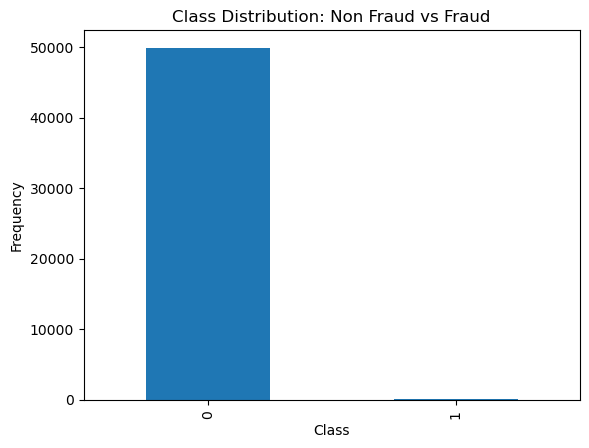

In [10]:
# Check for class distribution
print(data_no_outliers_clip['isFraud'].value_counts())

# Visualize the class imbalance (optional)
import matplotlib.pyplot as plt
data_no_outliers_clip['isFraud'].value_counts().plot(kind='bar')
plt.title('Class Distribution: Non Fraud vs Fraud')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

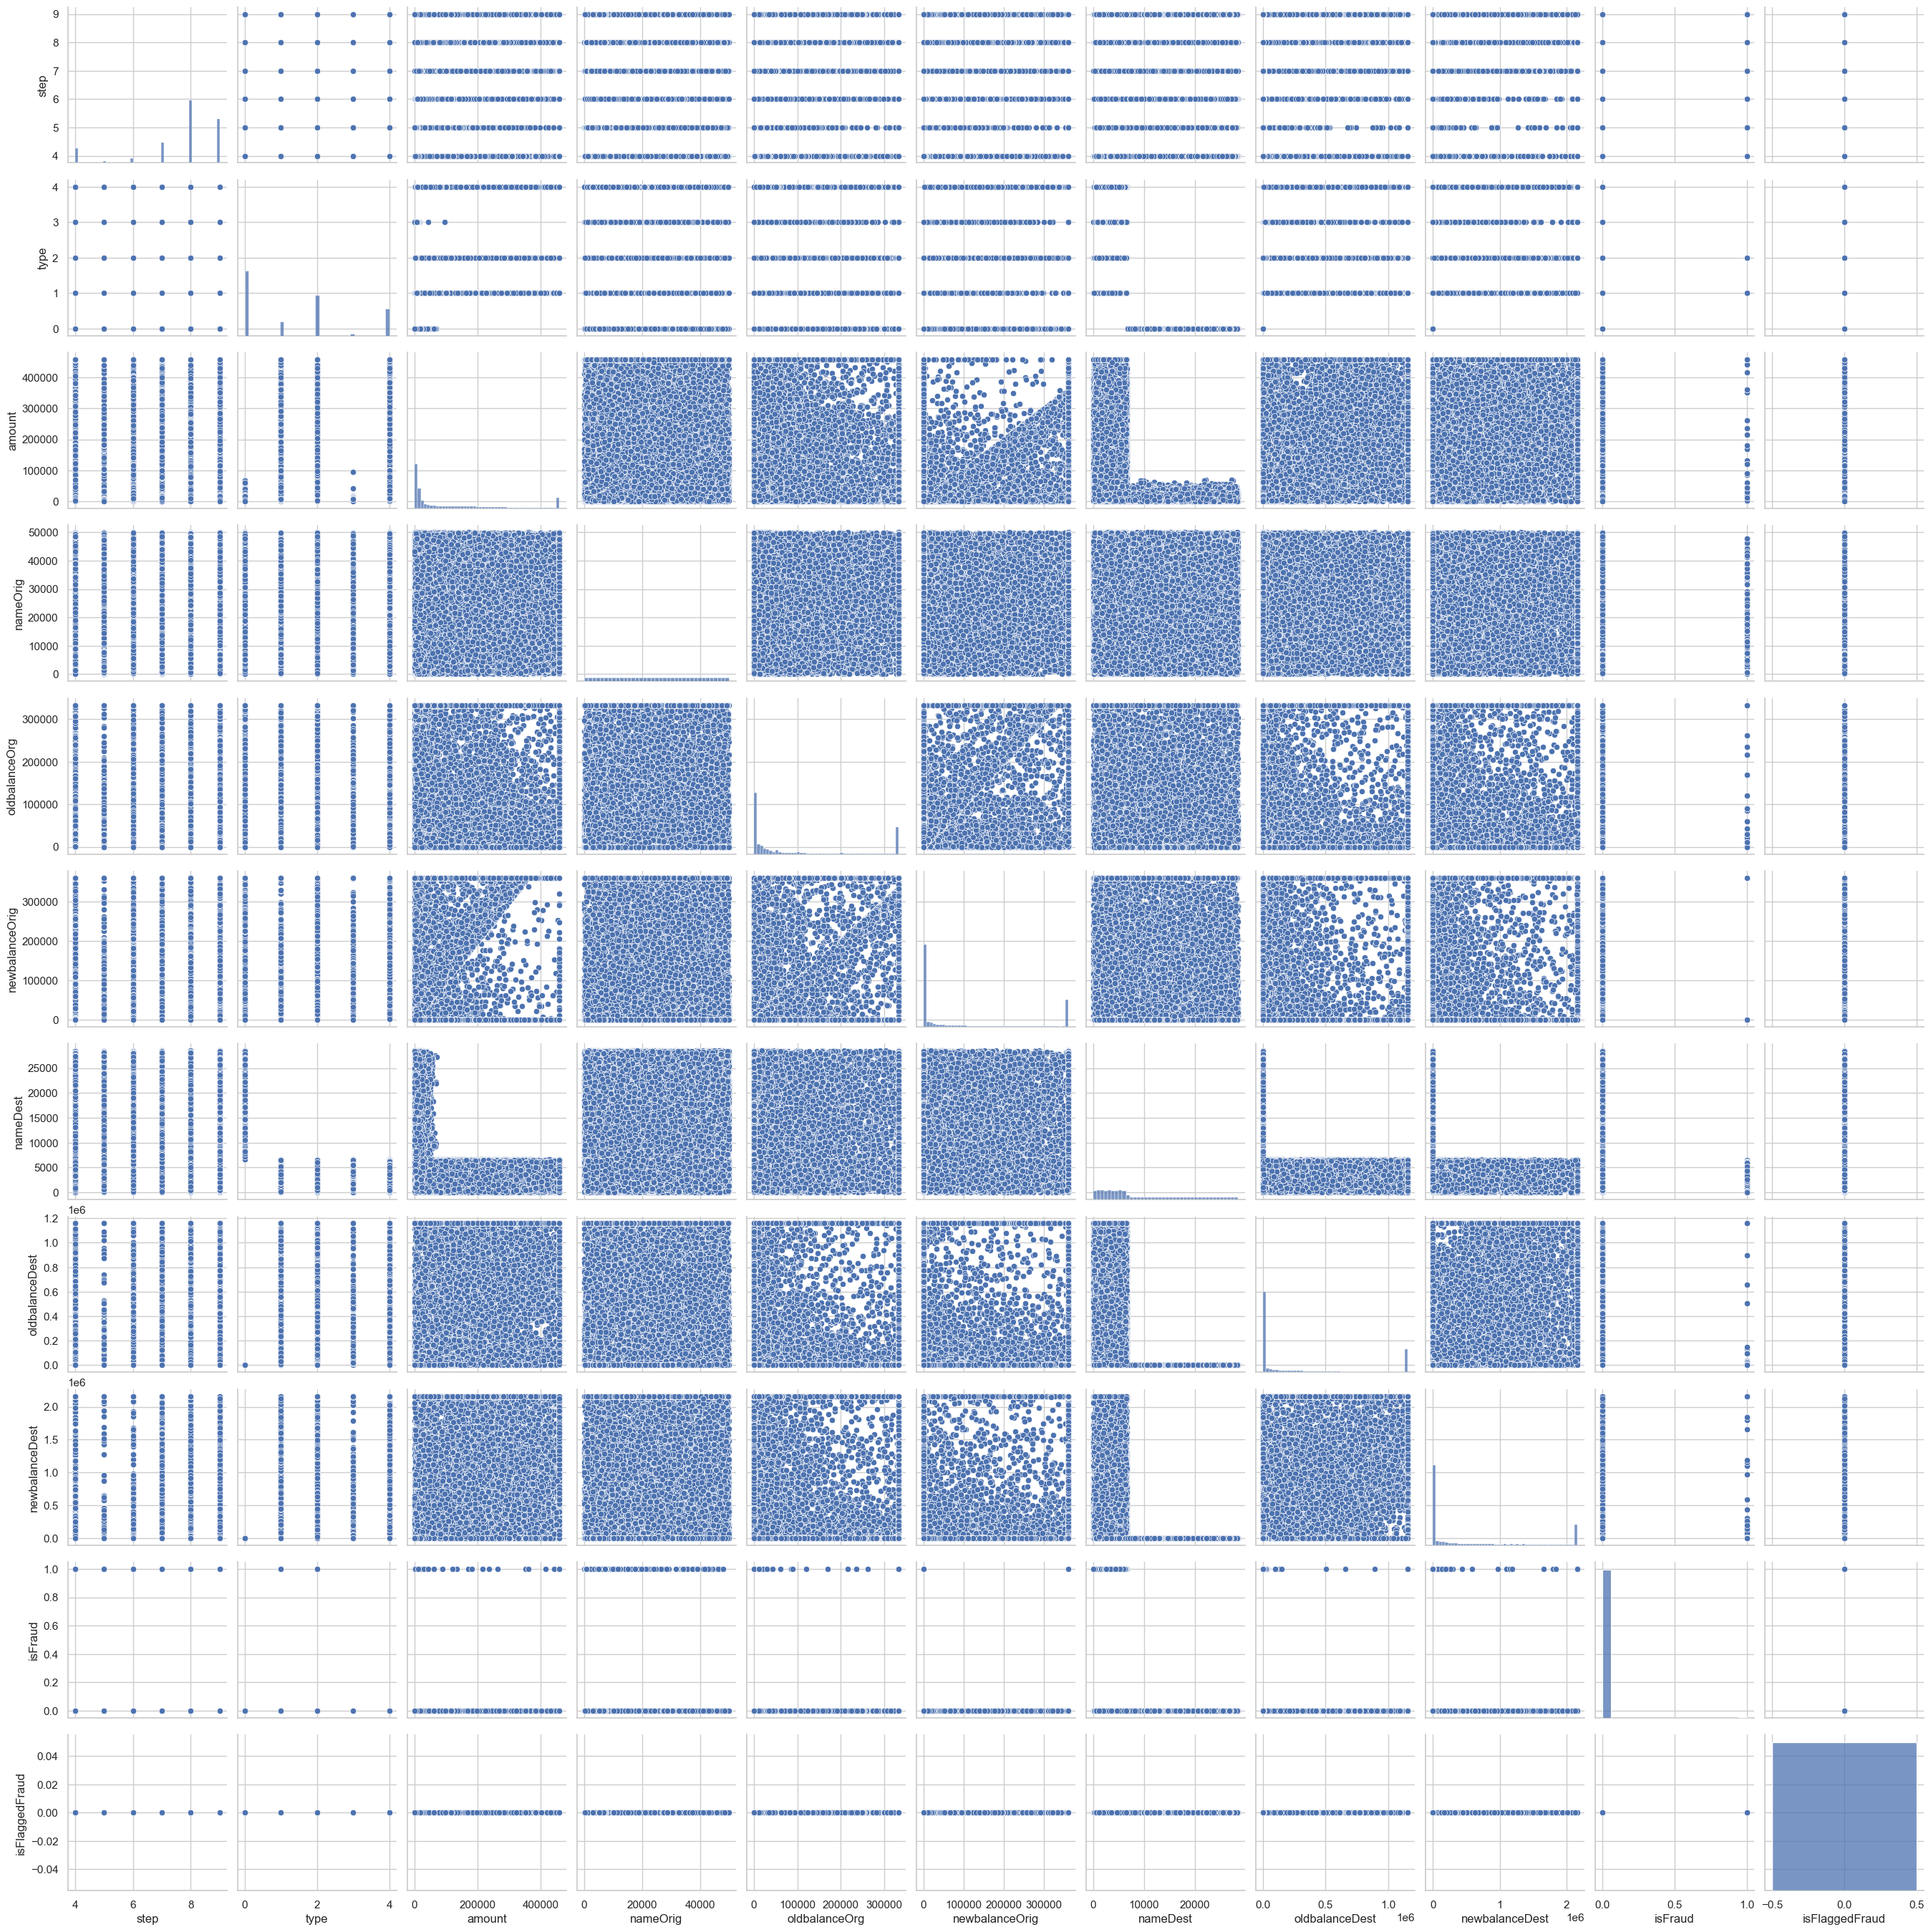

In [57]:
sns.pairplot(data_no_outliers_clip)

### Splitting data 

In [15]:
X = data_no_outliers_clip.drop(columns=['isFraud','nameOrig', 'nameDest','isFlaggedFraud'])
y = data_no_outliers_clip['isFraud']

In [11]:
X.head()

step  type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0   4.0   0.0   9839.64       170136.0       160296.36             0.0   
1   4.0   0.0   1864.28        21249.0        19384.72             0.0   
2   4.0   1.0    181.00          181.0            0.00             0.0   
3   4.0   2.0    181.00          181.0            0.00         21182.0   
4   4.0   0.0  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [61]:
X_scaled.shape, y.shape

((50000, 7), (50000,))

In [63]:
# Again check the shape of X and y variable
X.shape, y.shape

((50000, 7), (50000, 1))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42,stratify=y)

In [14]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40000, 7), (10000, 7), (40000,), (10000,))

### Initial Modeling

In [15]:
classifiers = {
    'Random Forest Classifier': RandomForestClassifier(n_estimators=47, random_state=34),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42, learning_rate=0.3),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=600, learning_rate=0.05, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='mlogloss'),    
}

In [16]:
results = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)  

    train_accuracy = accuracy_score(y_train, y_train_pred) * 100
    test_accuracy = accuracy_score(y_test, y_test_pred) * 100

    results.append({
        'Model': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

initial_modeling = pd.DataFrame(results)
print("\nInitial Model Performance:")
initial_modeling


Initial Model Performance:


Model  Train Accuracy  Test Accuracy
0  Random Forest Classifier        100.0000          99.95
1       Logistic Regression         99.8200          99.81
2                       SVM         99.8000          99.80
3                       KNN         99.8500          99.85
4               Naive Bayes         99.7950          99.79
5             Decision Tree         99.8600          99.82
6                  AdaBoost         99.8575          99.90
7         Gradient Boosting         96.5800          96.55
8                   XGBoost         99.9125          99.97

### Handling Imbalanced Data

In [17]:
# Check for class imbalance (fraud vs non-fraud)
data_no_outliers_clip['isFraud'].value_counts()

isFraud
0    49900
1      100
Name: count, dtype: int64

#### SMOTE (Synthetic Minority Over-sampling Technique)

In [12]:
X = data_no_outliers_clip.drop(columns=['isFraud','nameOrig', 'nameDest','isFlaggedFraud'])
y = data_no_outliers_clip['isFraud']

scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X,Y = smote.fit_resample(X_Scaled,y)
# X,Y = smote.fit_resample(X ,y)

X_train, X_test, y_train, y_test = train_test_split(X,Y , test_size=0.2, random_state=42,stratify=Y)

In [19]:
print(f"Train X shape: {X_train.shape}")
print(f"Train y shape: {y_train.shape}")
print(f"Test X shape: {X_test.shape}")
print(f"Test y shape: {y_test.shape}")

Train X shape: (79840, 7)
Train y shape: (79840,)
Test X shape: (19960, 7)
Test y shape: (19960,)


In [20]:
classifiers = {
    'Random Forest Classifier': RandomForestClassifier(n_estimators=47, random_state=34),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(kernel='linear', probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42, learning_rate=0.3),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=600, learning_rate=0.05, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='mlogloss'),    
}

results = []

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)   
    y_test_prob = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None  

    train_accuracy = accuracy_score(y_train, y_train_pred) * 100
    test_accuracy = accuracy_score(y_test, y_test_pred) * 100
    f1 = f1_score(y_test, y_test_pred)
    auc_roc = roc_auc_score(y_test, y_test_prob) if y_test_prob is not None else "N/A"
    cm = confusion_matrix(y_test, y_test_pred)

    results.append({
        'Model': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'F1-score': f1,
        'AUC-ROC': auc_roc,
        'Confusion Matrix': cm
    })

over_modeling = pd.DataFrame(results)
print("\nModel Performance after Over Sampling:")
over_modeling


Model Performance after Over Sampling:


Model  Train Accuracy  Test Accuracy  F1-score  \
0  Random Forest Classifier      100.000000      99.939880  0.999399   
1       Logistic Regression       91.300100      91.342685  0.914768   
2                       SVM       94.283567      94.173347  0.942836   
3                       KNN       99.698146      99.539078  0.995412   
4               Naive Bayes       87.085421      87.129259  0.881662   
5             Decision Tree       96.308868      96.372745  0.964683   
6                  AdaBoost       97.568888      97.765531  0.977925   
7         Gradient Boosting       99.834669      99.789579  0.997900   
8                   XGBoost       99.049349      99.158317  0.991619   

    AUC-ROC             Confusion Matrix  
0  0.999997      [[9969, 11], [1, 9979]]  
1  0.968727  [[8959, 1021], [707, 9273]]  
2  0.967080   [[9206, 774], [389, 9591]]  
3  0.998540      [[9888, 92], [0, 9980]]  
4  0.958881  [[7821, 2159], [410, 9570]]  
5  0.989266    [[9348, 632], [92, 9888]]  
6  0.997868   [[9635, 345], [101, 9879]]  
7  0.999961      [[9938, 42], [0, 9980]]  
8  0.999626    [[9853, 127], [41, 9939]]

### Hyperparameter Tuning

In [72]:
classifiers = {
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),    
}

In [73]:
param_grids = {
    'Random Forest Classifier': {
        'n_estimators': [1000, 2500],   
        'max_depth': [17, 18, 19],   
        'min_samples_split': [6, 8],   
        'min_samples_leaf': [3, 4],  
        'max_features': ['sqrt'],
        'bootstrap': [True],
        'class_weight': [{0: 1.02, 1: 0.98}]  # Corrected
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10]
    },
    'SVM': {
        'C': [1, 10],  
        'kernel': ['rbf']
    },
    'KNN': {
        'n_neighbors': [3, 5]
    },
    'Naive Bayes': {
        'var_smoothing': [1e-9]
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [5, 10]
    },
    'AdaBoost': {
        'n_estimators': [100]
    },
    'Gradient Boosting': {
        'n_estimators': [100],
        'learning_rate': [0.1]
    },
    'XGBoost': {
        'n_estimators': [100],
        'learning_rate': [0.1],
        'max_depth': [5]
    }
}


In [74]:
from sklearn.model_selection import RandomizedSearchCV
import random

n_iter_search = 20 

best_models = {}
results = []

for name, clf in classifiers.items():
    print(f"\n🔍 Hyperparameter tuning for {name} using RandomizedSearchCV...")

    param_grid = param_grids.get(name, {})

    if param_grid:
        random_search = RandomizedSearchCV(
            estimator=clf,
            param_distributions=param_grid,
            n_iter=n_iter_search,  
            cv=5,
            n_jobs=-1,
            verbose=1,
            random_state=42
        )
        
        random_search.fit(X_train,y_train)

        best_models[name] = random_search.best_estimator_
        
        print(f"✅ Best Parameters for {name}: {random_search.best_params_}")
        train_accuracy = accuracy_score(y_train, random_search.best_estimator_.predict(X_train))
        print(f"🎯 Training Accuracy for {name}: {train_accuracy * 100:.2f}%")

        y_pred = random_search.best_estimator_.predict(X_test)
        hyper_accuracy = accuracy_score(y_test, y_pred)
        print(f"🎯 Test Accuracy for {name}: {hyper_accuracy * 100:.2f}%\n")

        results.append({
            'Model': name,
            'Best Parameters': random_search.best_params_,
            'Test Accuracy': hyper_accuracy * 100,
            'Training Accuracy': train_accuracy * 100,
        })

hyper_modeling = pd.DataFrame(results)

print("\n📊 Model Performance After Randomized Search:")
hyper_modeling


🔍 Hyperparameter tuning for Random Forest Classifier using RandomizedSearchCV...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
✅ Best Parameters for Random Forest Classifier: {'n_estimators': 2500, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 19, 'class_weight': {0: 1.02, 1: 0.98}, 'bootstrap': True}
🎯 Training Accuracy for Random Forest Classifier: 99.96%
🎯 Test Accuracy for Random Forest Classifier: 99.92%


🔍 Hyperparameter tuning for Logistic Regression using RandomizedSearchCV...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
✅ Best Parameters for Logistic Regression: {'C': 10}
🎯 Training Accuracy for Logistic Regression: 91.32%
🎯 Test Accuracy for Logistic Regression: 91.37%


🔍 Hyperparameter tuning for SVM using RandomizedSearchCV...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
✅ Best Parameters for SVM: {'kernel': 'rbf', 'C': 10}
🎯 Training Accuracy for SVM: 99.03%
🎯 Test Accuracy for SVM: 99.0

Model  \
0  Random Forest Classifier   
1       Logistic Regression   
2                       SVM   
3                       KNN   
4               Naive Bayes   
5             Decision Tree   
6                  AdaBoost   
7         Gradient Boosting   
8                   XGBoost   

                                     Best Parameters  Test Accuracy  \
0  {'n_estimators': 2500, 'min_samples_split': 6,...      99.924850   
1                                          {'C': 10}      91.372745   
2                         {'kernel': 'rbf', 'C': 10}      99.018036   
3                                 {'n_neighbors': 3}      99.654309   
4                           {'var_smoothing': 1e-09}      87.129259   
5          {'min_samples_split': 5, 'max_depth': 20}      99.864729   
6                              {'n_estimators': 100}      98.867735   
7        {'n_estimators': 100, 'learning_rate': 0.1}      99.298597   
8  {'n_estimators': 100, 'max_depth': 5, 'learnin...      99.744489   

   Training Accuracy  
0          99.962425  
1          91.320140  
2          99.030561  
3          99.812124  
4          87.085421  
5          99.991232  
6          98.756263  
7          99.182114  
8          99.769539

### Find the best model

In [85]:
best_model_row = hyper_modeling.loc[hyper_modeling['Test Accuracy'].idxmax()]
best_model_name = best_model_row['Model']
best_model = best_models[best_model_name]
print(f"\n✅ Best Model Based on Test Accuracy: {best_model_name}")
print(f"📊 Best Test Accuracy: {best_model_row['Test Accuracy']:.2f}%")


✅ Best Model Based on Test Accuracy: Random Forest Classifier
📊 Best Test Accuracy: 99.92%


### Model Performance Across Each Stages:

In [86]:
merged_df = pd.merge(initial_modeling[['Model', 'Accuracy']], 
                     over_modeling[['Model', 'Accuracy']], 
                     on='Model', 
                     suffixes=('_Initial', '_Oversampling'))

merged_df = pd.merge(merged_df, 
                     hyper_modeling[['Model', 'Test Accuracy']], 
                     on='Model')

merged_df.columns = ['Model', 
                     'Accuracy_Initial',  
                     'Accuracy_Oversampling', 
                     'Accuracy_Hyperparameter_Tuning'
                    ]

print("\nModel Performance Across Each Stage:")
merged_df


Model Performance Across Each Stage:


Model  Accuracy_Initial  Accuracy_Oversampling  \
0  Random Forest Classifier             99.95              99.939880   
1       Logistic Regression             99.81              91.342685   
2                       SVM             99.80              94.173347   
3                       KNN             99.85              99.539078   
4               Naive Bayes             99.79              87.129259   
5             Decision Tree             99.82              96.372745   
6                  AdaBoost             99.90              97.765531   
7         Gradient Boosting             96.55              99.789579   
8                   XGBoost             99.97              99.158317   

   Accuracy_Hyperparameter_Tuning  
0                       99.924850  
1                       91.372745  
2                       99.018036  
3                       99.654309  
4                       87.129259  
5                       99.864729  
6                       98.867735  
7                       99.298597  
8                       99.744489

### Final Random Forest Model

✅ Train Accuracy: 0.9996
✅ Test Accuracy: 0.9992

Confusion Matrix:
[[9967   13]
 [   2 9978]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9980
           1       1.00      1.00      1.00      9980

    accuracy                           1.00     19960
   macro avg       1.00      1.00      1.00     19960
weighted avg       1.00      1.00      1.00     19960



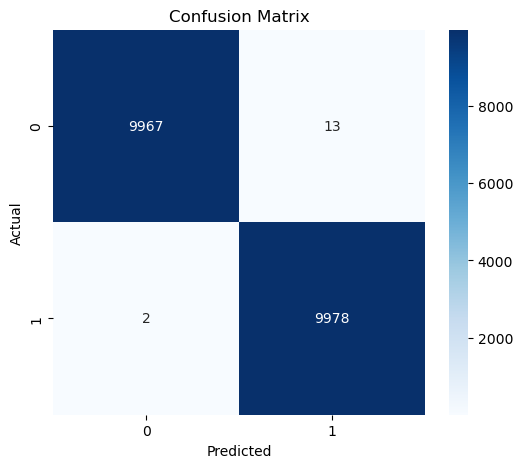

In [13]:
rf_model = RandomForestClassifier(
    n_estimators=2500,
    min_samples_split=6,
    min_samples_leaf=3,
    max_features='sqrt',
    max_depth=19,
    bootstrap=True,
    random_state=42,
    class_weight={0: 1.02, 1: 0.98},
)

rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"✅ Train Accuracy: {train_accuracy:.4f}")
print(f"✅ Test Accuracy: {test_accuracy:.4f}")

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
df_comparison = pd.DataFrame({'True Label': y_test, 'Predicted Label': y_test_pred})
df_comparison['Correct Prediction'] = (df_comparison['True Label'] == df_comparison['Predicted Label']).astype(int)
df_comparison.head()

True Label  Predicted Label  Correct Prediction
49207           0                0                   1
53539           1                1                   1
32941           0                0                   1
84646           1                1                   1
32064           0                0                   1

### Save model

In [15]:
import joblib
joblib.dump(rf_model,'randomforestmodel.pkl')
joblib.dump(label_encoder,'label_encoder.pkl')
joblib.dump(scaler,'X_Scaled.pkl')

['X_Scaled.pkl']

In [82]:
#END